In [1]:
# first import needed packages
import numpy as np
import xarray as xr
import xmitgcm
import xgcm
import glob
from os.path import expanduser,join
import sys
import matplotlib.pyplot as plt
import ecco_v4_py as ecco

user_home_dir = expanduser('~')
sys.path.append(join(user_home_dir,'ECCOv4-py'))   # only needed if ecco_v4_py files are stored under this directory
sys.path.append(join(user_home_dir,'ECCO-v4-Python-Tutorial'))   # only needed if ecco_v4_py files are stored under this directory

import ecco_access as ea
import gsw

In [2]:
# indicate mode of access
# options are:
# 'download': direct download from internet to your local machine
# 'download_ifspace': like download, but only proceeds 
#                     if your machine have sufficient storage
# 's3_open': access datasets in-cloud from an AWS instance
# 's3_open_fsspec': use jsons generated with fsspec and 
#                   kerchunk libraries to speed up in-cloud access
# 's3_get': direct download from S3 in-cloud to an AWS instance
# 's3_get_ifspace': like s3_get, but only proceeds if your instance 
#                   has sufficient storage

# fancy way of opening big datasets hosted on the cloud
access_mode = 's3_open_fsspec'

# download root (parent) directory
download_root_dir = join(user_home_dir,'efs_ecco','ECCO_V4r4_PODAAC')

# for access_mode = 's3_open_fsspec', need to specify the root directory 
# containing the jsons
jsons_root_dir = join(user_home_dir,'efs_ecco','mzz-jsons')

# access and merge datasets
StartDate = '1992-01'
EndDate = '2017-12'

In [3]:
ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",
                   "ECCO_L4_DENS_STRAT_PRESS_LLC0090GRID_MONTHLY_V4R4",
                   "ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4"]

In [4]:
ds_dict = ea.ecco_podaac_to_xrdataset(ShortNames_list,\
                                            StartDate=StartDate,EndDate=EndDate,\
                                            mode=access_mode,\
                                            download_root_dir=download_root_dir,\
                                            max_avail_frac=0.5,\
                                            jsons_root_dir=jsons_root_dir)

In [5]:
ecco_grid = ds_dict['ECCO_L4_GEOMETRY_LLC0090GRID_V4R4']
dens_ds =  ds_dict['ECCO_L4_DENS_STRAT_PRESS_LLC0090GRID_MONTHLY_V4R4']
ts_ds = ds_dict['ECCO_L4_TEMP_SALINITY_LLC0090GRID_MONTHLY_V4R4']

In [6]:
ecco_grid.load()

<xarray.Dataset> Size: 89MB
Dimensions:  (tile: 13, j: 90, i: 90, k: 50, k_p1: 51, nb: 4, j_g: 90, i_g: 90,
              nv: 2, k_l: 50, k_u: 50)
Coordinates: (12/20)
    XC       (tile, j, i) float32 421kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    XC_bnds  (tile, j, i, nb) float32 2MB -115.0 -115.0 -107.9 ... -115.0 -108.5
    XG       (tile, j_g, i_g) float32 421kB -115.0 -115.0 ... -102.9 -109.0
    YC       (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    YC_bnds  (tile, j, i, nb) float32 2MB -88.18 -88.32 -88.3 ... -88.18 -88.16
    YG       (tile, j_g, i_g) float32 421kB -88.18 -88.32 ... -87.99 -88.02
    ...       ...
  * j_g      (j_g) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * k        (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_l      (k_l) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_p1     (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48 49 50
  * k_u      (k_u) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * tile     (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nb, nv
Data variables: (12/21)
    CS       (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    Depth    (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PHrefC   (k) float32 200B 49.05 147.1 245.2 ... 5.357e+04 5.794e+04
    PHrefF   (k_p1) float32 204B 0.0 98.1 196.2 ... 5.145e+04 5.57e+04 6.018e+04
    SN       (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    drC      (k_p1) float32 204B 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    ...       ...
    maskS    (k, tile, j_g, i) bool 5MB False False False ... False False False
    maskW    (k, tile, j, i_g) bool 5MB False False False ... False False False
    rA       (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    rAs      (tile, j_g, i) float32 421kB 1.802e+08 1.807e+08 ... 3.605e+08
    rAw      (tile, j, i_g) float32 421kB 3.617e+08 3.628e+08 ... 3.648e+08
    rAz      (tile, j_g, i_g) float32 421kB 1.799e+08 1.805e+08 ... 3.642e+08
Attributes: (12/58)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the Lat-Lon...
    uuid:                            87ff7d24-86e5-11eb-9c5f-f8f21e2ee3e0

In [11]:
dens_anom = dens_ds.RHOAnoma
temp = ts_ds.THETA
salt = ts_ds.SALT


('time', 'k', 'tile', 'j', 'i')
('time', 'k', 'tile', 'j', 'i')
('time', 'k', 'tile', 'j', 'i')


In [9]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41999")
client

<Client: 'tcp://127.0.0.1:41999' processes=4 threads=4, memory=15.27 GiB>

In [13]:
# the order in which the values are multiplied is important!
vol = ecco_grid.hFacC * ecco_grid.rA * ecco_grid.drF

('k', 'tile', 'j', 'i')


In [22]:
# sanity check: same dimensions, correct total global ocean volume (m3)
print(dens_anom.dims)
print(temp.dims)
print(salt.dims)
print(vol.dims)

vol.sum().values

('time', 'k', 'tile', 'j', 'i')
('time', 'k', 'tile', 'j', 'i')
('time', 'k', 'tile', 'j', 'i')
('k', 'tile', 'j', 'i')


array(1.3349979e+18, dtype=float32)

# Volumetric TS for 1 month

In [21]:
# create temperature and salinity bins
num_bins = 300
temp_bins = np.linspace(-3, 35, num=num_bins+1)
salt_bins = np.linspace(30, 38,  num=num_bins+1)

In [24]:
# load January 1992 data
t_0 = temp.isel(time=0).load()
s_0 = salt.isel(time=0).load()

In [25]:
# Use np.histogram2d to bin temperature, salinity, and sum the volume
hist_volume, T_edges, S_edges = np.histogram2d(t_0.values.ravel(), 
                                               s_0.values.ravel(), 
                                               bins=[temp_bins, salt_bins], 
                                               weights=vol.values.ravel(),
                                               density=False)

In [27]:
T_centers = (T_edges[:-1] + T_edges[1:]) / 2  # Compute bin centers for T
S_centers = (S_edges[:-1] + S_edges[1:]) / 2  # Compute bin centers for S

In [26]:
# mask out small histogram values
hist_volume[hist_volume < 1] = np.nan

/tmp/ipykernel_6351/3452360786.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar();


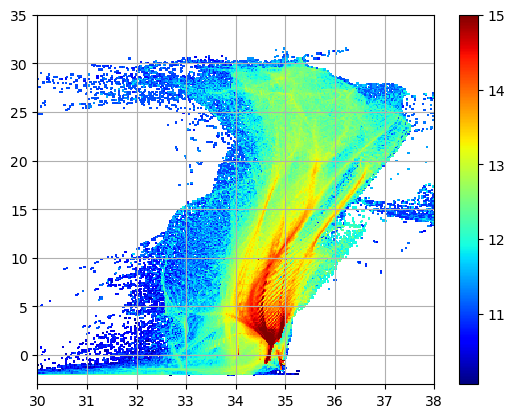

In [28]:
plt.pcolor(S_centers,T_centers,np.log10(hist_volume),vmax=15,
           cmap='jet');
plt.colorbar();
plt.grid()

# Volumetric TS over time

In [29]:
# animation of the above plot over time

# Volumetric TS using climatology